# 1. 데이터 불러오기 및 살피기

In [ ]:
-- 데이터 확인

SELECT *
FROM modular-conduit-411001.modulabs_project.data
LIMIT 10;

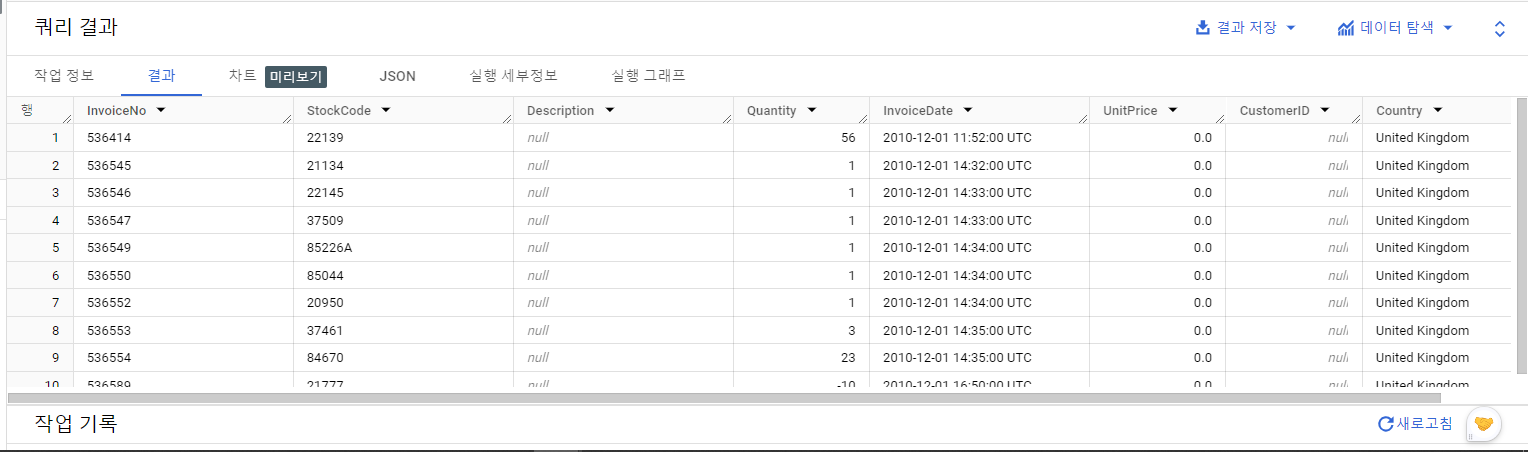

In [ ]:
-- 전체 데이터는 몇 행으로 구성되어 있는지 확인해 봅시다.

SELECT COUNT(InvoiceNo)
FROM modular-conduit-411001.modulabs_project.data;

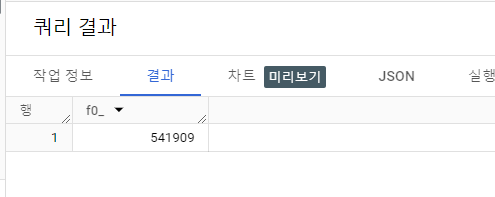

In [ ]:
-- 데이터 수 세기

SELECT COUNT(InvoiceNo) AS COUNT_InvoiceNo,
       COUNT(StockCode) AS COUNT_StockCode,
       COUNT(Description) AS COUNT_Description,
       COUNT(Quantity) AS COUNT_Quantity,
       COUNT(InvoiceDate) AS COUNT_InvoiceDate,
       COUNT(UnitPrice) AS COUNT_UnitPrice,
       COUNT(CustomerID) AS COUNT_CustomerID,
       COUNT(Country) AS COUNT_Country 
FROM modular-conduit-411001.modulabs_project.data;

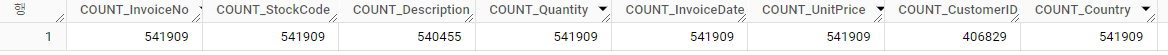

# 2. 데이터 전처리(1): 결측치 제거

In [ ]:
-- 컬럼 별 누락된 값의 비율 계산

SELECT
    'InvoiceNo' AS column_name, 
    ROUND(SUM(CASE WHEN InvoiceNo IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data
UNION ALL
SELECT
    'StockCode' AS column_name, 
    ROUND(SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data
UNION ALL
SELECT
    'Description' AS column_name, 
    ROUND(SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data
UNION ALL
SELECT
    'Quantity' AS column_name, 
    ROUND(SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data
UNION ALL
SELECT
    'InvoiceDate' AS column_name, 
    ROUND(SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data
UNION ALL
SELECT
    'UnitPrice' AS column_name, 
    ROUND(SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data
UNION ALL
SELECT
    'CustomerID' AS column_name, 
    ROUND(SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data
UNION ALL
SELECT
    'Country' AS column_name, 
    ROUND(SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) 
          / COUNT(*) * 100, 2) AS missing_percentage
FROM modular-conduit-411001.modulabs_project.data;

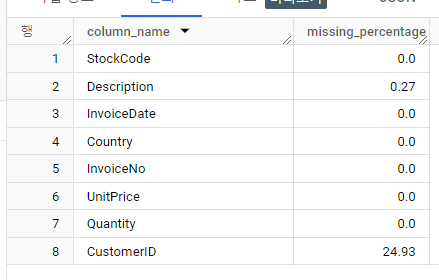

In [ ]:
-- 결측치 처리 전략

SELECT Description
FROM modular-conduit-411001.modulabs_project.data
WHERE StockCode = '85123A'
GROUP BY Description;

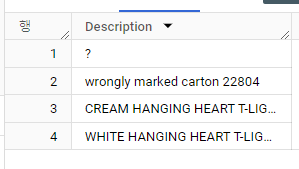

In [ ]:
-- 결측치 제거

DELETE FROM modular-conduit-411001.modulabs_project.data
WHERE CustomerID IS NULL OR Description IS NULL;

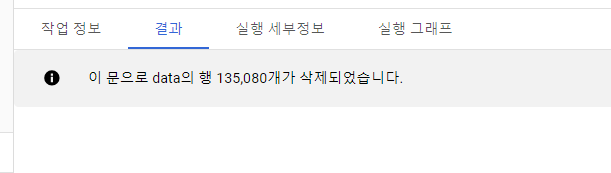

# 3. 데이터 전처리(2): 중복값 처리

In [ ]:
-- 중복값 확인

SELECT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, 
       UnitPrice, CustomerID, Country, COUNT(*) AS n_duplication
FROM modular-conduit-411001.modulabs_project.data
GROUP BY InvoiceNo, StockCode, Description, Quantity, InvoiceDate, 
         UnitPrice, CustomerID, Country
HAVING COUNT(*) > 1;

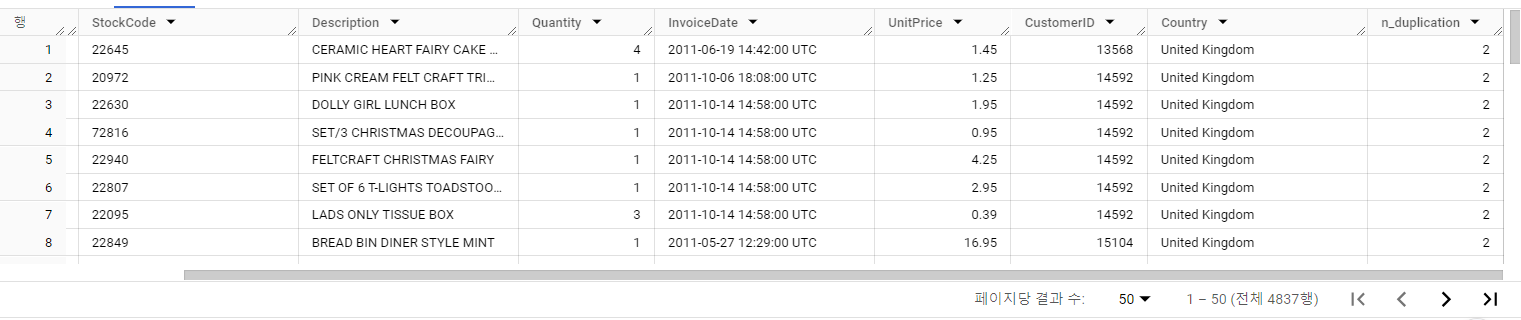

In [ ]:
-- 중복값 처리
SELECT DISTINCT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
FROM modular-conduit-411001.modulabs_project.data;

-- 중복값을 처리한 테이블 업데이트
CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.data AS
SELECT DISTINCT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country
FROM modular-conduit-411001.modulabs_project.data;

-- 업데이트된 테이블 확인
SELECT COUNT(*)
FROM modular-conduit-411001.modulabs_project.data;

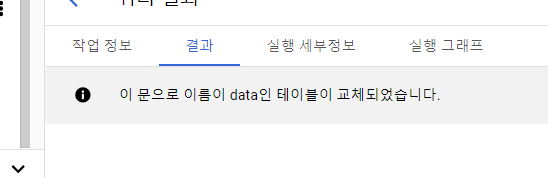

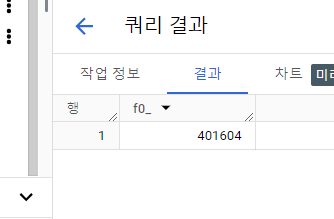

# 4. 데이터 전처리(3): 오류값 처리

In [ ]:
-- 오류값 처리

-- InvoiceNo 살펴보기

SELECT COUNT(DISTINCT InvoiceNo)
FROM modular-conduit-411001.modulabs_project.data;

-- 유니크한 InvoiceNo 데이터 100개 확인하기

SELECT DISTINCT InvoiceNo
FROM modular-conduit-411001.modulabs_project.data
LIMIT 100;

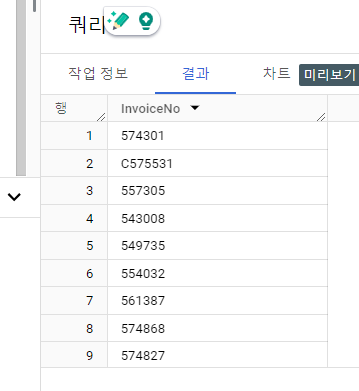

In [ ]:
--  'C'로 시작하는 행을 필터링

SELECT *
FROM modular-conduit-411001.modulabs_project.data
WHERE InvoiceNo LIKE 'C%'
LIMIT 100;

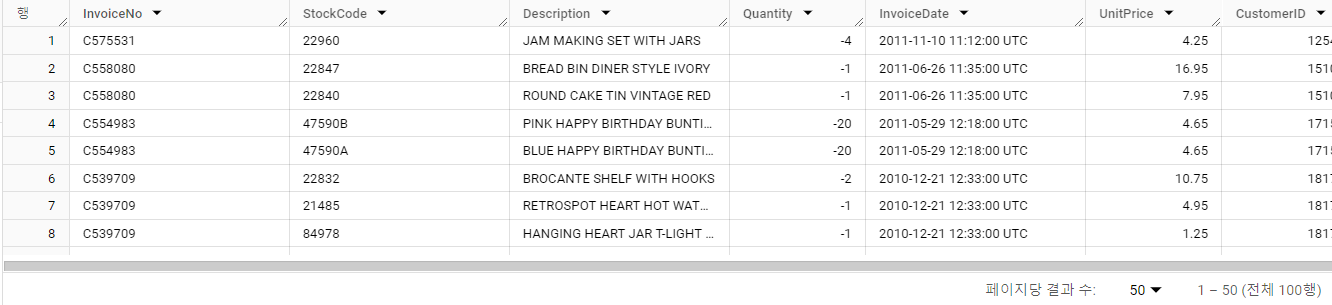

In [ ]:
-- 구매 건 상태가 Canceled 인 데이터의 비율(%)은 어떻게 되나요? 
-- 이를 계산할 수 있는 쿼리문을 작성하고, 
-- 취소 비율을 소수점 첫번째 자리까지 구해 주세요

SELECT ROUND(SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END)   #### 문제해결 Check point
             / COUNT(*) * 100, 1) 
FROM modular-conduit-411001.modulabs_project.data;
-- 취소 데이터는 분석가 판단에 따라 처리, 추가 분석 여지도 있다

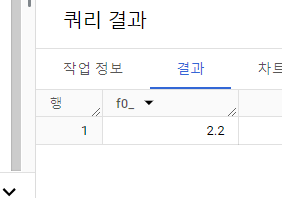

## 문제해결 PRE 회고 Check Point
1. InvoiceNo 컬럼 데이터에 C가 포함될 경우 카운트를 하는 경우 이전 노드에서 배운 COUNTIF() 함수를 사용했다.
2. 그러나 조금 조사해보니 COUNTIF() 함수는 빅쿼리에서는 사용가능하지만 다른 SQL에서는 CASE WHEN 조건문을 사용하는 것을 권장한다는 것을 알게 되었다.
3. 다른 SQL에도 호환 가능하도록 CASE WHEN 조건문으로 수정하여 작성하였다.

In [ ]:
-- StockCode 살펴보기
-- 고유한 StockCode의 개수를 출력해보겠습니다.

SELECT COUNT(DISTINCT StockCode)
FROM modular-conduit-411001.modulabs_project.data;

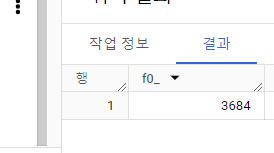

In [ ]:
-- StockCode 별 등장 빈도를 출력해보겠습니다. 상위 10개의 제품들을 출력해 보세요.

SELECT StockCode, COUNT(*) AS sell_cnt 
FROM modular-conduit-411001.modulabs_project.data
GROUP BY StockCode
ORDER BY sell_cnt DESC
LIMIT 10;

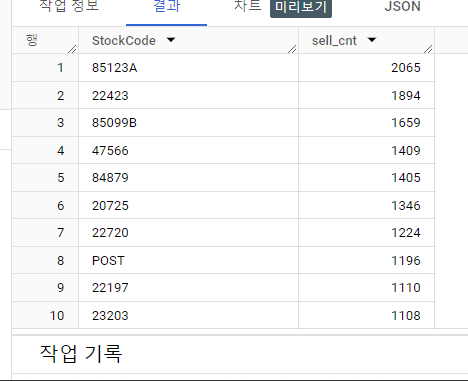

In [ ]:
-- StockCode의 문자열 내 숫자의 길이를 구해 봅시다.

WITH UniqueStockCodes AS (
  SELECT DISTINCT StockCode
  FROM modular-conduit-411001.modulabs_project.data
)
SELECT
  LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count,
  COUNT(*) AS stock_cnt
FROM UniqueStockCodes
GROUP BY number_count
ORDER BY stock_cnt DESC;

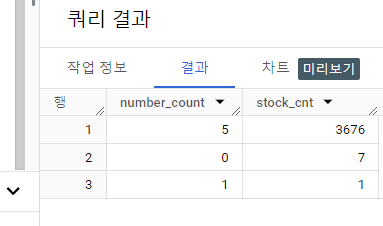

In [ ]:
-- 숫자가 0~1개인 값들에는 어떤 코드들이 들어가 있는지를 확인해 봅시다.

SELECT DISTINCT StockCode, number_count
FROM (
  SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) 
    AS number_count
  FROM modular-conduit-411001.modulabs_project.data
) 
WHERE number_count BETWEEN 0 and 1;

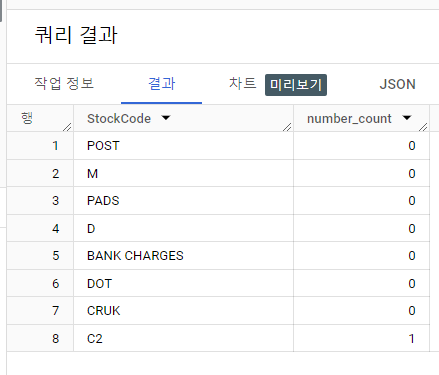

In [ ]:
-- 해당 코드 값들을 가지고 있는 데이터 수는 전체 데이터 수 대비 몇 퍼센트일까요? 
-- 소수점 두번째 자리까지 구해 주세요.

SELECT 
    ROUND(SUM(CASE WHEN (LENGTH(StockCode) - 
    LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', ''))) 
    BETWEEN 0 and 1 THEN 1 ELSE 0 END)/ COUNT(*) * 100, 2) 
FROM modular-conduit-411001.modulabs_project.data;

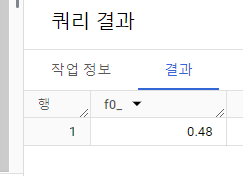

In [ ]:
-- 제품과 관련되지 않은 거래 기록을 제거하는 쿼리문을 작성해 주세요. 

DELETE FROM modular-conduit-411001.modulabs_project.data
WHERE StockCode IN (
  SELECT DISTINCT StockCode
  FROM (
    SELECT StockCode,
    LENGTH(StockCode) - LENGTH(REGEXP_REPLACE(StockCode, r'[0-9]', '')) AS number_count
  FROM modular-conduit-411001.modulabs_project.data
  ) 
  WHERE number_count BETWEEN 0 and 1
);

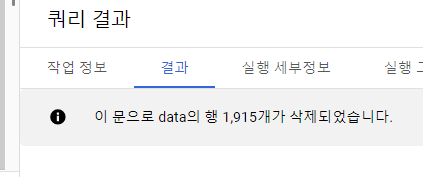

In [ ]:
-- Description 살펴보기
-- 먼저 데이터셋에서 고유한 Description 별 출현 빈도를 계산하고
-- 상위 30개를 출력해 주세요.

SELECT Description, COUNT(*) AS description_cnt
FROM modular-conduit-411001.modulabs_project.data
GROUP BY Description
ORDER BY description_cnt DESC
LIMIT 30;

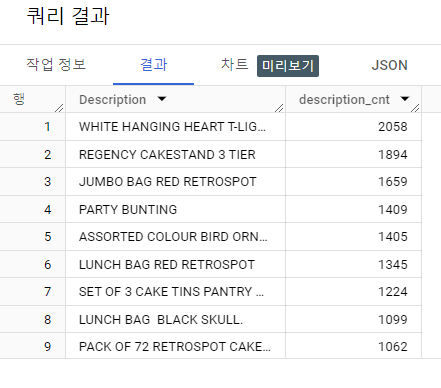

In [ ]:
-- 대소문자가 혼합된 Description이 있는지 확인해 봅시다.

SELECT DISTINCT Description
FROM modular-conduit-411001.modulabs_project.data
WHERE REGEXP_CONTAINS(Description, r'[a-z]');

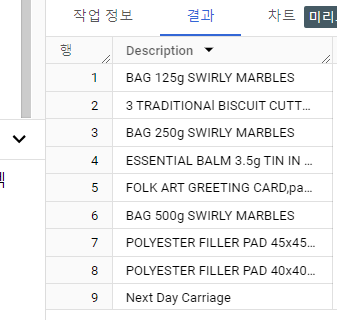

In [ ]:
-- 우선 서비스 관련 정보를 포함하는 행들을 제거하는 쿼리문을 작성해 보세요.

DELETE FROM modular-conduit-411001.modulabs_project.data
WHERE Description IN ('Next Day Carriage', 'High Resolution Image');

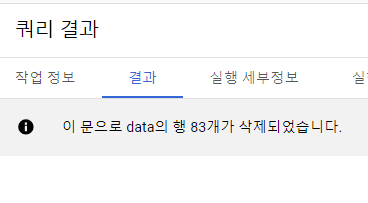

In [ ]:
-- 이번에는 대소문자를 혼합하고 있는 데이터를 대문자로 표준화하는 쿼리문을 작성해 보세요.

CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.data AS
SELECT
  * EXCEPT (Description),
    UPPER(Description) AS Description 
FROM modular-conduit-411001.modulabs_project.data;

-- 확인
SELECT *
FROM modular-conduit-411001.modulabs_project.data;

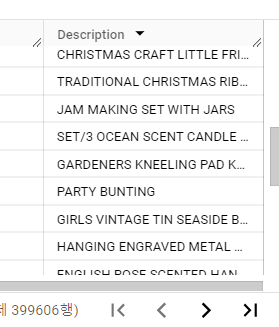

In [ ]:
-- UnitPrice 살펴보기
-- UnitPrice의 최솟값, 최댓값, 평균을 구해 보세요.

SELECT MIN(UnitPrice) AS min_price, MAX(UnitPrice) AS max_price, AVG(UnitPrice) AS avg_price
FROM modular-conduit-411001.modulabs_project.data;

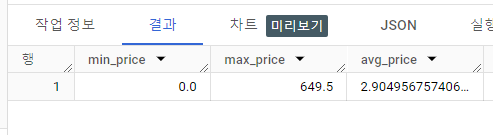

In [ ]:
-- 단가가 0원인 거래의 개수, 구매 수량(Quantity)의 최솟값, 최댓값, 평균을 구해 보세요.

SELECT COUNT(InvoiceNo) AS cnt_quantity, MIN(Quantity) AS min_quantity, 
       MAX(Quantity) AS max_quantity, AVG(Quantity) AS avg_quantity
FROM modular-conduit-411001.modulabs_project.data
WHERE UnitPrice = 0;

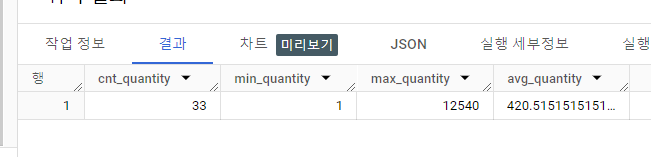

In [ ]:
-- 이 데이터(UnitPrice = 0)를 제거하고 일관된 데이터셋을 유지하도록 하겠습니다.

DELETE FROM modular-conduit-411001.modulabs_project.data
WHERE UnitPrice = 0;

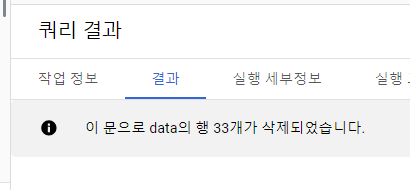

# 5. RFM 스코어

In [ ]:
-- RFM 스코어

-- Recency
-- DATE 함수를 활용하여 InvoiceDate 컬럼을 연월일 자료형으로 변경해 주세요.

SELECT *, DATE(InvoiceDate) AS InvoiceDay
FROM modular-conduit-411001.modulabs_project.data;

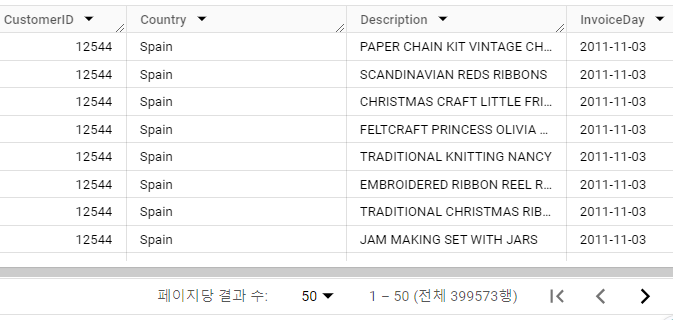

In [ ]:
-- 모든 고객들을 통틀어 가장 최근 구매 일자를 기준으로, 
-- 우선 가장 최근 구매 일자를 MAX() 함수로 찾아보겠습니다.

SELECT 
   MAX(InvoiceDate) AS most_recent_date, 
   -- DATE(InvoiceDate) AS InvoiceDay
FROM modular-conduit-411001.modulabs_project.data;

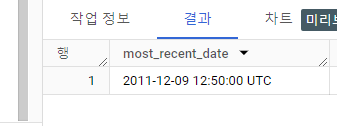

In [ ]:
-- 이번에는 유저 별로 가장 최근에 일어난 구매 정보를 정리해 봅시다. 
-- 유저 별로 가장 큰 InvoiceDay를 찾아서 가장 최근 구매일로 저장해 주겠습니다.

SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
FROM modular-conduit-411001.modulabs_project.data
GROUP BY CustomerID;

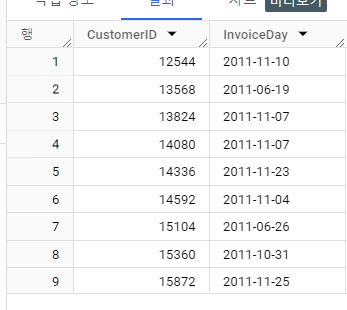

In [ ]:
-- 다음에는 가장 최근 일자(most_recent_date)와 유저별 마지막 구매일(InvoiceDay)간의
-- 차이를 계산하겠습니다.

SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM modular-conduit-411001.modulabs_project.data
  GROUP BY CustomerID
);

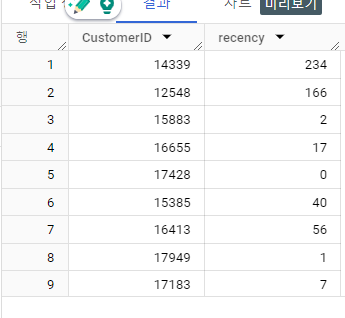

In [ ]:
-- 이제 최종 데이터 셋에 필요한 데이터들을 각각 정제해서 이어붙이도록 하겠습니다. 
-- 지금까지의 결과를 user_r이라는 이름의 테이블로 저장해 주세요.

CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.user_r AS
SELECT
  CustomerID, 
  EXTRACT(DAY FROM MAX(InvoiceDay) OVER () - InvoiceDay) AS recency
FROM (
  SELECT 
    CustomerID,
    MAX(DATE(InvoiceDate)) AS InvoiceDay
  FROM modular-conduit-411001.modulabs_project.data
  GROUP BY CustomerID
); 

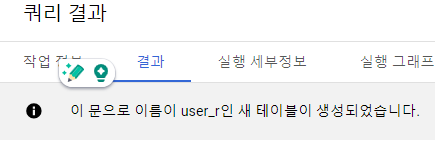

In [ ]:
-- Frequency

-- 1. 전체 거래 건수 계산. 우선 각 고객의 거래 건수를 세어 봅시다. 
-- 거래 건은 InvoiceNo를 기준으로 파악하면 되기 때문에, 
-- 고객마다 고유한 InvoiceNo의 수를 세어 주겠습니다.

SELECT
  CustomerID,
  COUNT(DISTINCT InvoiceNo) AS purchase_cnt
FROM modular-conduit-411001.modulabs_project.data
GROUP BY CustomerID;

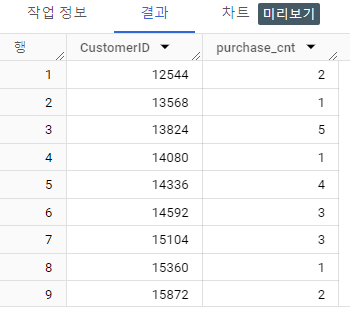

In [ ]:
-- 2. 구매한 아이템의 총 수량 계산. 그 다음으로는 각 고객 별로 구매한 아이템의 총 수량을 더해주겠습니다.
SELECT
  CustomerID,
  SUM(Quantity) AS item_cnt
FROM modular-conduit-411001.modulabs_project.data
GROUP BY CustomerID;

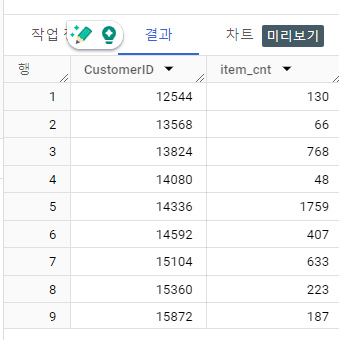

In [ ]:
-- 3. 이제 위에서 구한 '1. 전체 거래 건수 계산'과 
-- '2. 구매한 아이템의 총 수량 계산'의 결과를 합쳐서 user_rf라는 이름의 테이블에 
-- 저장해 주겠습니다.

CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.user_rf AS
-- (1) 전체 거래 건수 계산
WITH purchase_cnt AS ( 
  SELECT
    CustomerID,
    COUNT(DISTINCT InvoiceNo) AS purchase_cnt
  FROM modular-conduit-411001.modulabs_project.data
  GROUP BY CustomerID
),
-- (2) 구매한 아이템 총 수량 계산
item_cnt AS (
  SELECT
    CustomerID,
    SUM(Quantity) AS item_cnt
  FROM modular-conduit-411001.modulabs_project.data
  GROUP BY CustomerID
)
-- 기존의 user_r에 (1)과 (2)를 통합
SELECT
  pc.CustomerID,
  pc.purchase_cnt,
  ic.item_cnt,
  ur.recency
FROM purchase_cnt AS pc
JOIN item_cnt AS ic
  ON pc.CustomerID = ic.CustomerID
JOIN modular-conduit-411001.modulabs_project.user_r AS ur
  ON pc.CustomerID = ur.CustomerID;

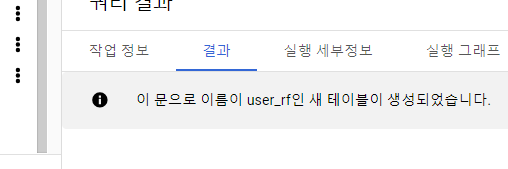

In [ ]:
-- Monetary

SELECT *
FROM modular-conduit-411001.modulabs_project.data
LIMIT 10;

-- 1. 고객별 총 지출액 계산. 고객별 총 지출액을 계산해 보세요. 
-- 소수점 첫째 자리에서 반올림하세요.

SELECT
  CustomerID,
  ROUND(SUM(Quantity * UnitPrice), 0) AS user_total
FROM modular-conduit-411001.modulabs_project.data
GROUP BY CustomerID;

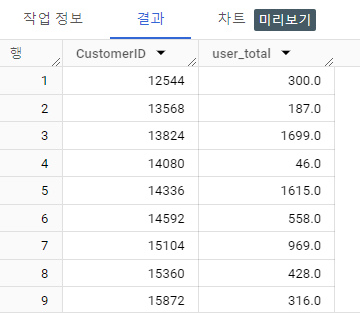

In [ ]:
-- 2. 고객별 평균 거래 금액 계산. 고객별 평균 거래 금액을 구하기 위해
-- 1) data 테이블을 user_rf 테이블과 조인(LEFT JOIN) 한 후,
-- 2) purchase_cnt로 나누어서 3) user_rfm 테이블로 저장해 봅시다.

CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.user_rfm AS   
SELECT
  rf.CustomerID AS CustomerID,
  rf.purchase_cnt,
  rf.item_cnt,
  rf.recency,
  ut.user_total,
  ROUND(ut.user_total/rf.purchase_cnt, 0) AS user_average
FROM modular-conduit-411001.modulabs_project.user_rf rf
LEFT JOIN (
  -- 고객 별 총 지출액
  SELECT
    CustomerID,
    ROUND(SUM(Quantity * UnitPrice), 0) AS user_total
  FROM modular-conduit-411001.modulabs_project.data
  GROUP BY CustomerID
) ut
ON rf.CustomerID = ut.CustomerID;

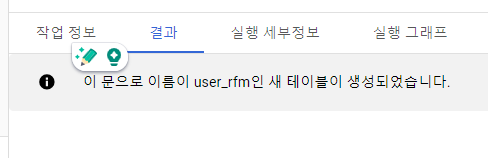

In [ ]:
-- RFM 통합 테이블 출력하기
SELECT *
FROM modular-conduit-411001.modulabs_project.user_rfm;

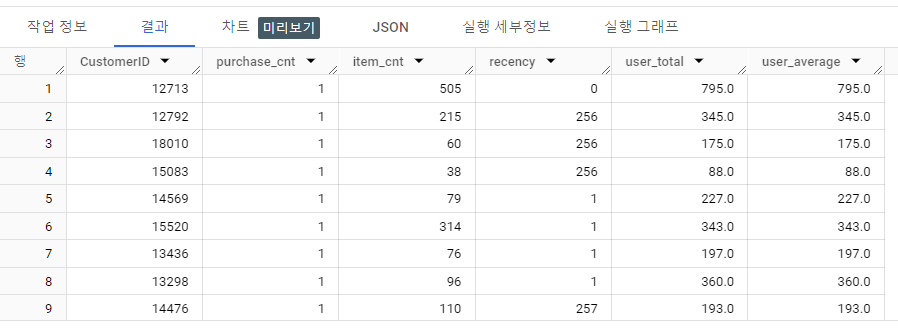

# 6. 추가 Feature 추출

In [ ]:
-- 추가 Feature 추출
-- 1. 구매하는 제품의 다양성

-- 우선 1) 고객 별로 구매한 상품들의 고유한 수를 계산합니다. 
-- 높은 숫자가 나오는 것은 해당 고객이 다양한 제품들을 구매한다는 의미이며, 
-- 낮은 값이 나오는 경우 소수의 제품들만 구매한다는 것을 의미합니다.

-- 이후 2) user_rfm 테이블과 결과를 합치고, 이를 
-- 3) user_data라는 이름의 테이블에 저장하겠습니다.

CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.user_data AS  
WITH unique_products AS (
  SELECT
    CustomerID,
    COUNT(DISTINCT StockCode) AS unique_products
  FROM modular-conduit-411001.modulabs_project.data
  GROUP BY CustomerID
)
SELECT ur.*, up.* EXCEPT (CustomerID)
FROM modular-conduit-411001.modulabs_project.user_rfm AS ur
JOIN unique_products AS up
ON ur.CustomerID = up.CustomerID;

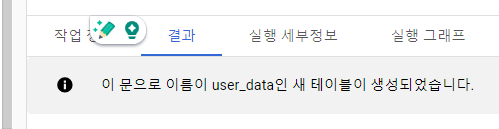

In [ ]:
-- 2. 평균 구매 주기. 평균 구매 소요 일수를 계산하고, 
-- 그 결과를 user_data에 통합해 줍시다.

CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.user_data AS 
WITH purchase_intervals AS (
  -- (2) 고객 별 구매와 구매 사이의 평균 소요 일수
  SELECT
    CustomerID,
    CASE WHEN ROUND(AVG(interval_), 2) IS NULL THEN 0 
    ELSE ROUND(AVG(interval_), 2) END AS average_interval
  FROM (
    -- (1) 구매와 구매 사이에 소요된 일수
    SELECT
      CustomerID,
      DATE_DIFF(InvoiceDate, LAG(InvoiceDate) 
      OVER (PARTITION BY CustomerID ORDER BY InvoiceDate), DAY) AS interval_
    FROM
      modular-conduit-411001.modulabs_project.data
    WHERE CustomerID IS NOT NULL
  )
  GROUP BY CustomerID
)
SELECT u.*, pi.* EXCEPT (CustomerID)
FROM modular-conduit-411001.modulabs_project.user_data AS u
LEFT JOIN purchase_intervals AS pi
ON u.CustomerID = pi.CustomerID;

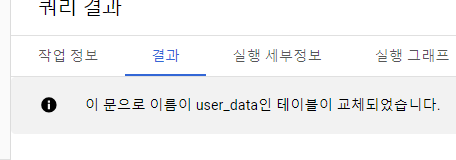

In [ ]:
-- 3. 구매 취소 경향성
-- 취소 빈도와 취소 비율을 계산하고 그 결과를 user_data에 통합해 줍시다. 
-- 취소 비율은 소수점 두번째 자리까지 구해 주세요.
CREATE OR REPLACE TABLE modular-conduit-411001.modulabs_project.user_data AS
WITH TransactionInfo AS (
  SELECT
    CustomerID,
    COUNT(InvoiceNo) AS total_transactions,
    SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END) AS cancel_frequency,
    ROUND(SUM(CASE WHEN InvoiceNo LIKE 'C%' THEN 1 ELSE 0 END) / 
          COUNT(InvoiceNo) * 100, 2) AS cancel_rate                            #### 문제해결 회고 Check Point
  FROM modular-conduit-411001.modulabs_project.data
  GROUP BY CustomerID
)
SELECT u.*, t.* EXCEPT(CustomerID)
FROM modular-conduit-411001.modulabs_project.user_data AS u
LEFT JOIN TransactionInfo AS t
ON u.CustomerID = t.CustomerID;

## 문제해결 PRE 회고 Check Point

1. cancel_rate 컬럼을 정의할 때 임시테이블 TransactionInfo 밖에서 정의하면 InvoiceNo 컬럼이 정의되지 않았다는 오류가 생겼다.
2. 임시테이블 안에서는 InvoiceNo 컬럼을 자유롭게 manipuate할 수 있어서 cancel_rate 컬럼을 TransactionInfo 안에 정의함으로써 문제를 해결할 수 있었다.

In [ ]:
-- 지금까지 추가적인 feature를 추출하기 위한 작업을 진행하였습니다.
-- 다양한 컬럼들을 활용하여 고객의 구매 패턴과 선호도를 보다 심층적으로 
-- 이해할 수 있도록 최종적으로 user_data를 출력해보겠습니다.
SELECT *
FROM modular-conduit-411001.modulabs_project.user_data;

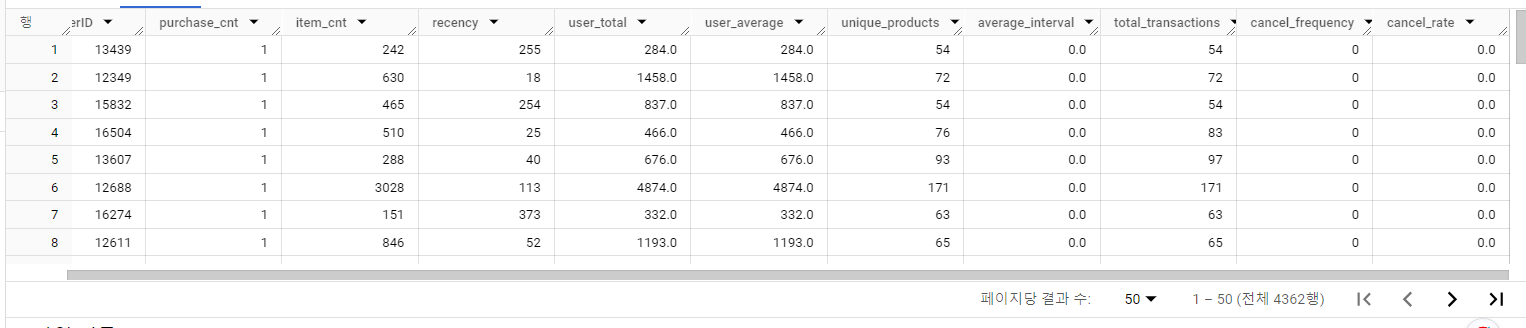

# 7. 데이터 다운로드 및 파이썬과의 연결

In [7]:
# 이번에는 파이썬에서 파일을 불러올 차례입니다. Pandas를 import한 후 csv 파일을 불러오겠습니다.

import pandas as pd 
user_data = pd.read_csv('user_data.csv')

In [8]:
# 전체적인 데이터를 살펴보기 위해 head()를 활용하여 첫 5개 행을 출력해 보겠습니다.

user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,14432,6,2013,9,2248.0,375.0,256,0.20,377,0,0.00
1,12428,11,3477,25,6366.0,579.0,256,0.87,292,5,1.71
2,13268,14,3525,17,3106.0,222.0,256,0.56,439,7,1.59
3,13747,1,8,373,80.0,80.0,1,0.00,1,0,0.00
4,14424,1,48,17,322.0,322.0,1,0.00,1,0,0.00


# 회고

## 문제 해결

1. 처음 분석을 시작할 때 캐글 홈페이지에서 해당 데이터셋에 대한 설명을 충분히 숙지하고 시작했다. 엑셀 파일도 빠르게 한번 쭉 훑어보면서 내가 다룰 데이터를 조금이나마 더 직관적으로 이해하고 분석을 시작하고자 노력하였다.


2. 구매가 취소된 건의 비율을 구하는 문제에서 COUNTIF() 함수와 CASE WHEN 조건문에 대해 알게 된 것이 있다.
- InvoiceNo 컬럼 데이터에 C가 포함될 경우 카운트를 하는 경우 이전 노드에서 배운 COUNTIF() 함수를 사용했다.
- 그러나 조금 조사해보니 COUNTIF() 함수는 빅쿼리에서는 사용가능하지만 다른 SQL에서는 CASE WHEN 조건문을 사용하는 것을 권장한다는 것을 알게 되었다.
- 다른 SQL에도 호환 가능하도록 CASE WHEN 조건문으로 수정하여 작성하였다.
 
 
3. '구매 취소 경향성' 파트에 user_data 테이블에 취소비율 컬럼(cancel_rate)을 추가하는 과정에 겪은 문제와 해결 과정이 있었다. 
- cancel_rate 컬럼을 정의할 때 임시테이블 TransactionInfo 밖에서 정의하면 InvoiceNo 컬럼이 정의되지 않았다는 오류가 생겼다.
- 임시테이블 안에서는 InvoiceNo 컬럼을 자유롭게 manipuate할 수 있어서 cancel_rate 컬럼을 TransactionInfo 안에 정의함으로써 문제를 해결할 수 있었다.


4. 마지막에 파이썬 파일을 이 노트북 파일에서 불러올 때 오류가 생겼다. path를 'user_data.csv'로만 작성하니 출력이 되었다.


## 느낀점

1. 소비자 행동 분석 실무를 간접적으로 접할 수 있어서 너무 유익하였다. 실무에서 SQL을 자유자재로 다룰 수 있는 역량이 필수적이라는 것을 절실히 느겼다. 주말에 노드 14에서 주어졌던 문제들을 복습하는 시간을 가졌는데, 그것이 오늘 프로젝트를 수행하는데 있어 SQL 쿼리를 이해하고 작성하는 것에 중요한 발판이 되었음을 느꼈다.

2. 실제 프로젝트에서 데이터 전처리에 많은 노력과 시간이 소요되는 것을 느낄 수 있었다. 데이터를 이해하고 여러 관점에서 보기 좋게 다루는 일이 결코 쉽지 않다는 것을 느꼈다. 여러 책들과 코드를 이해하고 정리하여, 미래에 프로젝트 수행 시 떠오르는 아이디어를 구현하기 위해 자료와 코드를 적재적소에 활용할 수 있도록 준비해야 할 필요성을 느꼈다.